# Evaluation formative 4 - Quantum Machine Learning

## Supervised learning

The basic structure of a supervised pattern recognition or prediction task can be formally defined as follows.

**Given an input domain $\mathcal{X}$ and an output domain $\mathcal{Y}$, a training data set $\mathcal{D} = \{(x^1,y^1),\ldots, (x^M,y^M)\}$ of training pairs $(x^m,y^m)\in\mathcal{X}\times\mathcal{Y}$ with $m = 1,\ldots, M$ of training inputs $x^m$ and target outputs $y^m$, as well as a new unclassified input $\tilde{x}\in\mathcal{X}$, guess or predict the corresponding output $\tilde{y}\in\mathcal{Y}$.**

The input domain $\mathcal{X}$ will mostly be chosen to be the space $\mathbb{R}^N$ of real N-dimensional vectors, or for binary variables, the space of N-bit binary strings $\{0, 1\}^N$. The input vectors are also called **feature vectors** as they represent information on carefully selected features of an instance. In cases where the raw data is not from a numerical domain or does not have an obvious distance measure between instances one has to first find a suitable representation that maps the elements to numerical values.



### Supervised pattern classification tasks in real-life applications

Complete the following sentences with **classification** and **regression**:

1. **Regression** is about finding a function to predict the relationship between
some input and the dependent continuous output value. Given you know the
income and the effective tax rates of your friends, can you estimate your tax
rate given your income even though you don't know the actual calculation?

2. In **Classification**, we try to predict the discrete label of an instance. Given the
input and a set of possible labels, which one is it? 


In the table given below, which gives somes examples of supervised pattern classification tasks in real-life applications, specify in the third colum, the type of tasks by writing (1) for ***Binary classification tasks***; (2) for ***Regression tasks*** and (3) for ***Multi-label classification tasks***.

|Input| Output| Type of tasks
|:-----|:------|:-------------:|
|Last month's oil price| Tomorrow's oil price| (2) |
|Search history of a user|Chance to click on a car ad|(2) |
Insurance customer details| Chance of claiming| (2) |
|Images| Car, train or plane?| (3)|
|Recording of speech|Words contained in speech| (3) |
|Text segment| Prediction of next word to follow| (3) |
|Text| French or English?| (1) |
|Video| Contains a car?| (1) |
|Email| Is spam?| (1) |
|Spectrum of cancer cell| Malicious?| (1) |


### Life Cycle of a Machine Learning Project

Despite the diverse applications of machine learning, most machine learning projects follow a typical life cycle that includes some (or all) of the following steps : Visualize the data; Examine the data; Split the Dataset; Data Preprocessing; Load the data; Evaluate the models;  Train the Models.  Put that steps in the right order.
1. Loading the data
2. Examine the data
3. Split the Dataset
4. Visualize the data
5. Data Preprocessing
6. Train the Models
7. Evaluate the models

### Sklearn 

**Sklearn** est la librairie qui contient toutes les fonctions de l’état de l'art du Machine Learning. On y trouve les algorithmes les plus importants ainsi que diverses fonctions de pre-processing. 

Avec Sklearn, il suffit d'écrire quelques lignes pour développer des modèles de ML supervisés. Pour un modèle de Support Vector Classifier (SVC) par exemple, les fonctions suivantes
 sont utiliser pour... (compléter le tableau, x et y étant respectivement les features et les labels/target)

|Fonction| pour ....   |
|--------|-------------|
|model = SVC()| charger/appeler votre modèle|
|model.fit(x, y)| entrainer votre modèle|
|model.score(x, y) |évaluer votre modèle|
|model.predict(x) |générer des prédictions|

## Train a SMILES Dataset with Support Vector Regression

Use a support vector regression (SVR) to predict QED (quantitative estimation of druglikeness) from molecules of the ZING Dataset contained in the file `'./Dataset/smilesZn100.txt`. The input - structural feature of molecules is Morgan fingerprint and the output is QED.

The workflow is
1. Get molecular fingerprints of each molecules 
2. Split the dataset to training set and test set
3. Train a SVR model
4. Check the accuracy of prediction with $R²$ and mean-square error
5. Visualize the results from the model.

We recall that the **molecular fingerprint** represents the substructures of a molecule as a vector of binary numbers. It is a molecular structure descriptor use as input to reveal the relationship between molecular structure and properties, called **Quantitative Structure-Activity Relationships (QSAR)**.

### Get molecular fingerprints of each molecules 

* Path access of our prepared ZING dataset.


In [16]:
import os
import pandas as pd 

PATH = os.getcwd()
data_path = os.path.join(PATH, './Dataset/Zn10.txt')

* Open of our dataset inside a `Pandas Data Frame`

In [17]:
with open(data_path, 'r') as f:
    content = f.readlines()
    smile = [smi.split()[0] for smi in content]
    
df = pd.DataFrame(data=smile, columns=['Smiles'])
df

,Smiles
0,NC(=O)C1CCCCC1C(F)(F)F
1,CCCCCNC(=O)N1CCCC1CO
2,CCC(CC)c1cc(C[NH3+])on1
3,C[NH2+]C1CCC(c2ccccc2Cl)C1
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C
...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC
5997,CCCC[NH2+]C1CCc2ccccc21
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C


* Converted SMILES to `RDKit` molecules.

,Smiles,Molecules
0,NC(=O)C1CCCCC1C(F)(F)F,
1,CCCCCNC(=O)N1CCCC1CO,
2,CCC(CC)c1cc(C[NH3+])on1,
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,
...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,
5997,CCCC[NH2+]C1CCc2ccccc21,
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,

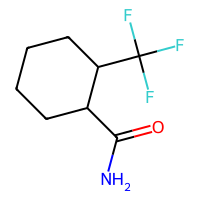
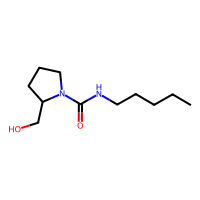
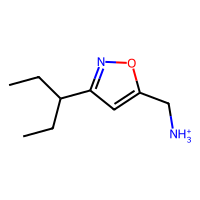
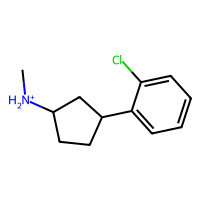
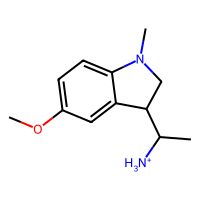
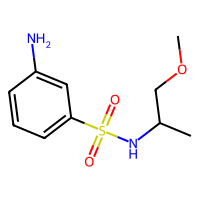
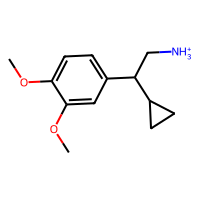
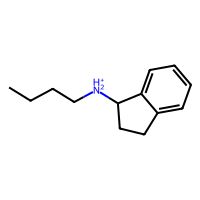
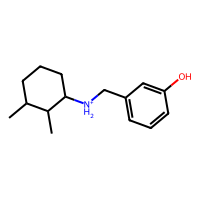
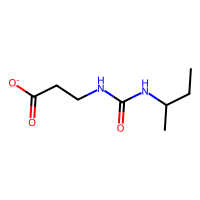

In [18]:
from rdkit.Chem import PandasTools

PandasTools.AddMoleculeColumnToFrame(frame=df, smilesCol='Smiles', molCol='Molecules')
df

* Check if there is rows where RDKit failed to generate molecules from SMILES.

In [19]:
df.isnull().sum()

Smiles       0
Molecules    0
dtype: int64

In [20]:
from rdkit.Chem import QED

molecule = df.iloc[:, 1].values
descriptor = [QED.qed(mol) for mol in molecule]

In [21]:
descriptor_df = pd.DataFrame(descriptor, columns=['QED'])
data = pd.concat([df, descriptor_df], axis=1)
data

,Smiles,Molecules,QED
0,NC(=O)C1CCCCC1C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7fede3499f50>,0.681153
1,CCCCCNC(=O)N1CCCC1CO,<rdkit.Chem.rdchem.Mol object at 0x7fede3499d20>,0.678579
2,CCC(CC)c1cc(C[NH3+])on1,<rdkit.Chem.rdchem.Mol object at 0x7fede3499c40>,0.738657
3,C[NH2+]C1CCC(c2ccccc2Cl)C1,<rdkit.Chem.rdchem.Mol object at 0x7fede3499bd0>,0.770859
4,COc1ccc2c(c1)C(C(C)[NH3+])CN2C,<rdkit.Chem.rdchem.Mol object at 0x7fede349a500>,0.781030
...,...,...,...
5995,COCC(C)NS(=O)(=O)c1cccc(N)c1,<rdkit.Chem.rdchem.Mol object at 0x7fede33899a0>,0.742397
5996,COc1ccc(C(C[NH3+])C2CC2)cc1OC,<rdkit.Chem.rdchem.Mol object at 0x7fede3389a10>,0.819062
5997,CCCC[NH2+]C1CCc2ccccc21,<rdkit.Chem.rdchem.Mol object at 0x7fede3389a80>,0.699701
5998,CC1CCCC([NH2+]Cc2cccc(O)c2)C1C,<rdkit.Chem.rdchem.Mol object at 0x7fede3389af0>,0.826891


* Check again if there are empty values in our new dataset.

In [22]:
data.isnull().sum()

Smiles       0
Molecules    0
QED          0
dtype: int64

* Let's evaluate the fingerprint of each molecules in our dataset.

In [23]:
from rdkit import DataStructs
from rdkit.Chem import AllChem
import numpy as np

fps = []
for mol in molecule:
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)
    fp_arr = np.zeros((1,))
    DataStructs.ConvertToNumpyArray(fp, fp_arr)
    fps.append(fp)
    
# Convert the fingerprint as an array 
fps = np.asarray(fps)
fps

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [24]:
fps.shape

(6000, 1024)

### Splitting our dataset 

We will split our dataset in train/test dataset, with,

1. **inputs**: fingerprint (features) of each molecules
2. **outputs**: QED (quantitative estimation of drug-likeness) 

In [25]:
qed = data.iloc[:,2].values
qed.shape[0] == fps.shape[0] #check that our inputs/outputs have the same number of lines

True

In [26]:
from sklearn.model_selection import train_test_split

seed = np.random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(fps, qed, train_size=0.8, random_state=seed)

### Train our model with SVR

In [27]:
from sklearn.svm import SVR

svr = SVR()
_ = svr.fit(X_train, y_train)#In order to cancel the printing of return value

### Check the accuracy of prediction

We recall that the **Mean Square Error** (MSE) is given by
$$ \frac{1}{2m}\sum_{i=1}^m \big( f(x^{(i)}) - y^{(i)} \big)^2 $$,
and the $R^2$ score,
$$ R^2 1- \frac{\sum_{i=1}^m (f(x^{(i)}) - y^{(i)})^2}{\sum_{i=1}^m \Big(f(x^{(i)}) - \frac{1}{m}\sum_{i=1}^m f(x^{(i)})\Big)^2 }.$$
If the value of $R^2$ is large, we have a better chance that the SVR model fits the observations.


In [28]:
from sklearn.metrics import mean_squared_error, r2_score

qed_predict = svr.predict(X_test)
r2 = r2_score(y_test, qed_predict)
mse = mean_squared_error(y_test, qed_predict)

print(f'The r2_score is {r2} and\n the mean square error is {mse}')

The r2_score is 0.5305745883047656 and
 the mean square error is 0.005124304792050947


### Visualization of the results from the model
  
We will plot (True values - Predicted values), and draw the linear regression between them by using `scipy.stats.linregress`.

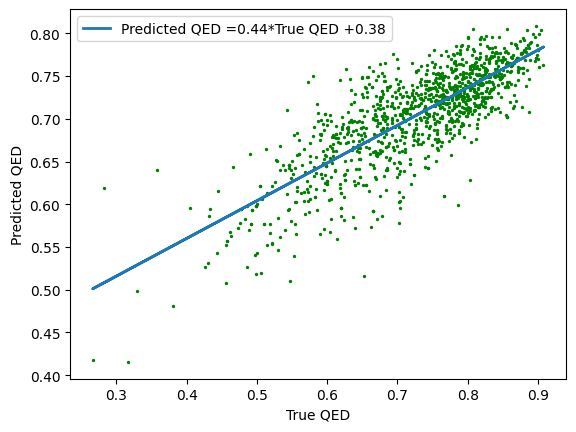

In [29]:
from scipy import stats
import matplotlib.pyplot as plt

vect_norm, intercept, r_value, p_value, std_error = stats.linregress(y_test, qed_predict)
fx = vect_norm * y_test + intercept

plt.scatter(y_test, qed_predict, color='green', s=2)
plt.plot(y_test, fx, label='Predicted QED ='+str(round(vect_norm,2))+'*True QED +'+str(round(intercept,2)), linewidth=2)
plt.xlabel('True QED')
plt.ylabel('Predicted QED')
plt.legend()
plt.show()

In [ ]:
import sklearn
print(sklearn.__version__)

In [ ]:
import rdkit
print(rdkit.__version__)